In [152]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
df=pd.read_csv('Emotions_training.csv')
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


# lower case convertion

use the string in built fucntion "str.lower()" for the text column

In [4]:
#converting to lowercase
df['text']=df['text'].str.lower()

# REMOVING THE LINK

removal of the link using the regular expression of the pattern or starts with http\

In [5]:
#remove links
import re

text = df['text']

def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Apply the function to remove links from each text in the 'text' column
df['text'] = df['text'].apply(remove_links)

# Remove next lines (\n)

In [6]:
#"\n" refers to the next line and by replacing the "\n" with empty string 
df['text'] = df['text'].str.replace('\n', '')

# Removal of Numbers

In [7]:
#remove words containing numbers
text=df['text']
def remove_words_with_numbers(text):
    words = text.split() 
    clean_words = [] 
    for word in words:
        has_digit = False
        for char in word:
            if char.isdigit():
                has_digit = True
                break
        if not has_digit:
            clean_words.append(word)  # If the word does not contain any digit, add it to the clean words list
    return' '.join(clean_words)  # Join the clean words list back to string
df['text'] = df['text'].apply(remove_words_with_numbers)


# REMOVE whitespaces

In [8]:
#strip() function used to remove trailing whitespaces
df['text'] = df['text'].str.strip()

# REMOVE Special characters and EMOJIS 

In [9]:
#remove special characters 
def remove_special_characters(text):
    special_characters = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
    for char in special_characters:
        text = text.replace(char, '')
    return text

df['text'] = df['text'].apply(remove_special_characters)

In [10]:
#remove emojis
import emoji
import pandas as pd

# Assuming 'df' is your DataFrame with a 'content' column containing text with emojis
text = df['text']

# Define a function to remove emojis
def remove_emojis(text):
    return emoji.demojize(text)

# Applying remove_emojis() function to each element of the 'content' column
text_without_emojis = text.apply(remove_emojis)



# Removal of stop words using gensim library

**Gensim, a popular Python library for topic modeling and natural language processing, offers the remove_stopwords function to eliminate common stopwords from text data. By invoking this function, you can efficiently preprocess text by removing irrelevant words like "the," "is," and "and," facilitating downstream analysis tasks such as text classification or topic modeling.

In [11]:
from gensim.parsing.preprocessing import preprocess_string
df['text'] = [' '.join(preprocess_string(text)) for text in df['text']]


# Stemming

**Stemming is a natural language processing technique used to reduce words to their root or base form, enabling normalization and simplification of text data. It helps in improving text analysis tasks such as information retrieval, sentiment analysis, and topic modeling by treating variations of words as a single entity. Popular stemming algorithms include Porter Stemmer, Snowball Stemmer, and Lancaster Stemmer.

In [12]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


#Tokenization is the process of breaking down a text or document into smaller units

ps = PorterStemmer() #PorterStemmer is used for stemming, which is the process of reducing words to their base or root form


def stem_sentence(sentence):
    words = word_tokenize(sentence) 
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)


df['text'] = df['text'].apply(stem_sentence)



# difference between stemming and lemitizing
**Stemming involves stripping affixes from words to get to the root form. It's done using simple and fast heuristic algorithms, which may result in the stem not being a valid word. For example, "running" would be stemmed to "run".

**Lemmatization, on the other hand, considers the context and meaning of the word along with its morphology to reduce it to its base or dictionary form (lemma). It often requires more computational resources and linguistic knowledge but results in valid words.

# LEMITIZING

Lemmatization is a linguistic process used to reduce words to their base or canonical form, known as the lemma, by considering the word's meaning and context. Unlike stemming, which simply removes suffixes or prefixes, lemmatization ensures that the resulting word is a valid one found in the language's dictionary.

In [13]:
#lemitizing 
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yashas.m/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatize each token in the list of tokens
    return ' '.join(lemmatized_tokens)


df['text'] = df['text'].apply(lemmatize_text)

**this below code helps in adding the different label classes into the respective arrays created for each labels 
and the displaying the count of each classes/label-0,1,2,3,4,5 that is sadness,joy,love,anger,fear and surprise

In [15]:
count = df['text'].count()# total count of the data/sample in the dataset
label=df['label'] 
text=df['text']
#creating the empty arrays 
label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
#this for loop helps in appending the each sample/data into the respective labels array based on the if conditions
for i in range(count):
    if label[i] == 0:
        label0.append(text[i])
    elif label[i] == 1:
        label1.append(text[i])
    elif label[i] == 2:
        label2.append(text[i])
    elif label[i] == 3:
        label3.append(text[i])
    elif label[i] == 4:
        label4.append(text[i])
        
    elif label[i]==5:
        label5.append(text[i])
    else:
        pass
#displaying the length of each labels 
print("the count of sadness is:",len(label0))
print("the count of joy is:",len(label1))
print("the count of love is:",len(label2))
print("the count of anger is:",len(label3))
print("the count of fear is:",len(label4))
print("the count of surprise is :",len(label5))

the count of sadness is: 4666
the count of joy is: 5362
the count of love is: 1304
the count of anger is: 2159
the count of fear is: 1937
the count of surprise is : 572


**percentage of each  label in the dataset 

In [16]:
#individual percentage
l0=(len(label0)/count)*100
l1=(len(label1)/count)*100
l2=(len(label2)/count)*100
l3=(len(label3)/count)*100
l4=(len(label4)/count)*100
l5=(len(label5)/count)*100
print(f"the perecentage of leabel\n 0={l0}% \n 1={l1}% \n 2={l2}% \n 3={l3}% \n 4={l4}% \n 5={l5}%")

the perecentage of leabel
 0=29.1625% 
 1=33.5125% 
 2=8.15% 
 3=13.493749999999999% 
 4=12.106250000000001% 
 5=3.5749999999999997%


# BAR graph representation

**this helps to visualize the each label and helps in finding out whether the dataset is imbalanced!

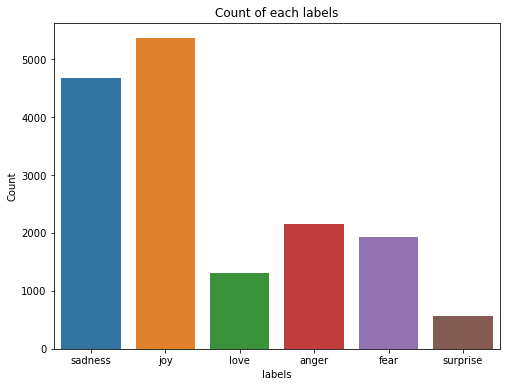

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['sadness', 'joy', 'love', 'anger','fear','surprise']
counts = [len(label0), len(label1), len(label2), len(label3), len(label4),len(label5)]


plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Count of each labels')
plt.xlabel('labels')
plt.ylabel('Count')
plt.show()


**In the above bar graph it denotes that the text related to the joy-1 is maximum and text related to the surprise  label -5 is minimum 

# Balancing the dataset classes 

**oversampling is better than under_sampling bcoz there might be some important data misses in the undersample due to less data or reduction od data size in each class

resample module from scikit-learn's utils subpackage provides functions for resampling data, particularly useful for addressing class imbalance in classification tasks. It allows you to randomly oversample minority classes or undersample majority classes to balance the dataset, improving the performance of machine learning models.

label-1 had the maximum samples / text so we have upsampled / increased the all minority classes until it reaches the label-1 sample count

In [178]:
from sklearn.utils import resample


# Count the number of samples in each class
class_counts = df['label'].value_counts()

# target count using maximum count among all the label 
target_count = class_counts.max()


resampled_data = []

# Loop through each class
for label in class_counts.index:
    # Extract data for the current class
    class_data = df[df['label'] == label]
    
    # Upsample (oversample) the class to match the target count
    sampled_data = resample(class_data, replace=True, n_samples=target_count, random_state=42)
    
    # Append the resampled data to the list
    resampled_data.append(sampled_data)

# Concatenate the resampled data for all classes
balanced_df = pd.concat(resampled_data)

# Displaying the count of samples in each class after balancing the dataset classes 
print(balanced_df['label'].value_counts())


1    5362
0    5362
3    5362
4    5362
2    5362
5    5362
Name: label, dtype: int64


In [93]:
''''
import pandas as pd
from sklearn.utils import resample

# Load your dataset
data = pd.read_csv('Emotions_training.csv')  # Replace with your actual file path

# Separate majority class
majority_class_label = data['label'].value_counts().idxmax()
majority_class = data[data['label'] == majority_class_label]

# Upsample minority classes
minority_classes = data[data['label'] != majority_class_label]
upsampled_minority_classes = []

# Loop through each minority class and upsample
for label in minority_classes['label'].unique():
    minority_class = minority_classes[minority_classes['label'] == label]
    upsampled_class = resample(minority_class, 
                               replace=True,  # sample with replacement
                               n_samples=majority_class.shape[0],  # to match majority class
                               random_state=42)
    upsampled_minority_classes.append(upsampled_class)

# Combine majority class with upsampled minority classes
balanced_df = pd.concat([majority_class] + upsampled_minority_classes)

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new distribution of the classes
print("Balanced class distribution:")
print(balanced_df['label'].value_counts())
''''

Balanced class distribution:
3    5362
1    5362
4    5362
2    5362
0    5362
5    5362
Name: label, dtype: int64


In [177]:
balanced_df

,text,label
2491,i feel glad that justice will be served west said,1
15585,i feel really valuable because of this knowing...,1
15488,i certainly have never felt it was appropriate...,1
11161,i feel assured that the future of online enter...,1
9145,i feel so thankful i have been able to figure ...,1
...,...,...
15825,i even feel it is a game that i am a part of s...,5
5319,i was talking to my district leader elder hill...,5
4775,i know this isnt real but it feels strange to ...,5
1756,i feel kinda strange too cause i didnt encount...,5


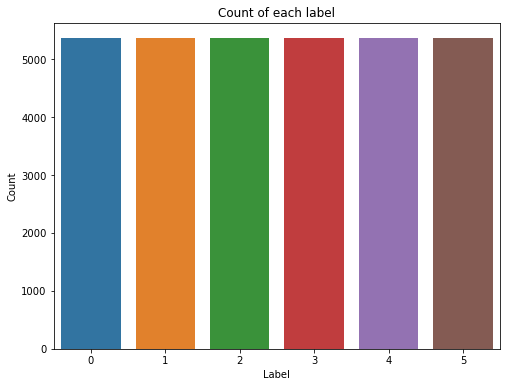

In [179]:
# Plot the count of each label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=balanced_df)
plt.title('Count of each label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**vectorization-
Text vectorization converts text data into numerical vectors, representing features such as word frequencies or semantic meanings. This transformation allows machine learning algorithms to process and analyze text, enabling tasks like sentiment analysis

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Handle NaN values by replacing them with an empty string
balanced_df['text'].fillna('', inplace=True)



## SPLITTING OF DATASET INTO TRAIN[70%],TEST[20%] AND VALIDATE [10%] DATASET

# RANDOM FOREST

**Random Forest is a popular ensemble learning algorithm that builds multiple decision trees during training and combines their predictions through voting or averaging. It's robust against overfitting, capable of handling large datasets with high dimensionality

In [31]:
''''
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
#print(X_train_tfidf)
''''

In [181]:



texts = balanced_df['text'].values
labels = balanced_df['label'].values
#texts =df['text'].values
#labels = df['label'].values


In [182]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

print(f"TF-IDF matrix shape: {X.shape}")


TF-IDF matrix shape: (32172, 5000)


In [163]:
''''
#Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, labels)
''''

In [183]:
# Split the data into training (70%), testing (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)  # 0.3333 * 0.3 ≈ 0.10

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}, Validation samples: {X_val.shape[0]}")


Training samples: 22520, Testing samples: 6434, Validation samples: 3218


In [ ]:
#smote

In [184]:
# Balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



In [ ]:
#logistic regression

In [212]:
from sklearn.linear_model import LogisticRegression

# Step 1: Build the initial model
lr_model = LogisticRegression(max_iter=1000)#to overcome the error (reached limit)
lr_model.fit(X_train, y_train)
train_predictions_lr = lr_model.predict(X_train)
test_predictions_lr = lr_model.predict(X_test)

print("Initial Logistic Regression Model")
print("Training Classification Report")
print(classification_report(y_train, train_predictions))
print("Test Classification Report")
print(classification_report(y_test, test_predictions))



Initial Logistic Regression Model
Training Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3729
           1       0.98      0.94      0.96      3757
           2       0.95      0.99      0.97      3731
           3       0.97      0.97      0.97      3743
           4       0.97      0.96      0.97      3775
           5       0.97      1.00      0.98      3785

    accuracy                           0.97     22520
   macro avg       0.97      0.97      0.97     22520
weighted avg       0.97      0.97      0.97     22520

Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1097
           1       0.95      0.91      0.93      1104
           2       0.94      0.97      0.95      1069
           3       0.94      0.96      0.95      1053
           4       0.95      0.92      0.94      1054
           5       0.95      1.00      0

In [220]:
# Step 2: Hyperparameter Tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
logreg_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_lr = logreg_best.predict(X_train)
y_test_pred_best_lr = logreg_best.predict(X_test)

print("Logistic Regression Model with Best Parameters")
print("Training Classification Report (Best Params):")
print(classification_report(y_train, y_train_pred_best_lr))
print("Test Classification Report (Best Params):")
print(classification_report(y_test, y_test_pred_best_lr))
print(best_params)

Logistic Regression Model with Best Parameters
Training Classification Report (Best Params):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3729
           1       1.00      0.99      0.99      3757
           2       0.99      1.00      0.99      3731
           3       0.99      1.00      1.00      3743
           4       1.00      0.99      0.99      3775
           5       0.99      1.00      1.00      3785

    accuracy                           0.99     22520
   macro avg       0.99      0.99      0.99     22520
weighted avg       0.99      0.99      0.99     22520

Test Classification Report (Best Params):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1097
           1       0.97      0.93      0.95      1104
           2       0.96      0.98      0.97      1069
           3       0.96      0.98      0.97      1053
           4       0.97      0.96      0.97      10

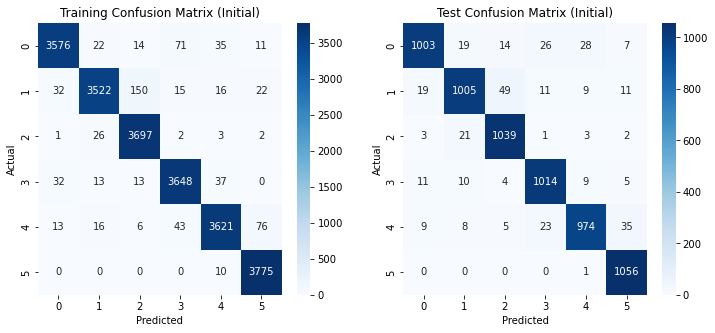

In [218]:
# Confusion Matrix for initial model(before hyperparameter tuning)
train_cm_initial = confusion_matrix(y_train, train_predictions_lr)
test_cm_initial = confusion_matrix(y_test, test_predictions_lr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm_initial, annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm_initial, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

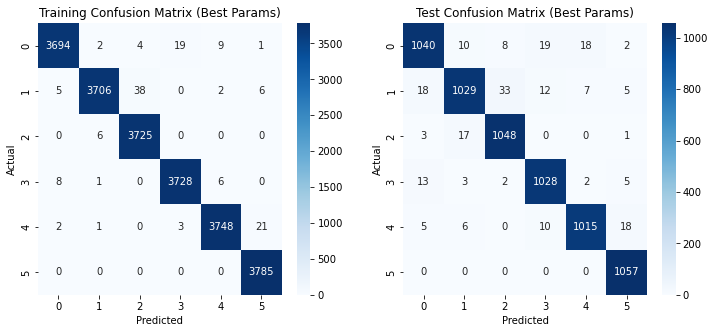

In [219]:
# Confusion Matrix for model with best parameters(after hyperparameter tuning)
train_cm_best_lr = confusion_matrix(y_train, y_train_pred_best_lr)
test_cm_best_lr = confusion_matrix(y_test, y_test_pred_best_lr)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm_best_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Training Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm_best_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [ ]:
#random forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Build the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Generate classification report for Training and Test datasets
y_train_pred_rf = rf.predict(X_train_balanced)
y_test_pred_rf= rf.predict(X_test)

print("Training Classification Report:\n", classification_report(y_train_balanced, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))



Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3785
           1       1.00      1.00      1.00      3785
           2       1.00      1.00      1.00      3785
           3       1.00      1.00      1.00      3785
           4       1.00      1.00      1.00      3785
           5       1.00      1.00      1.00      3785

    accuracy                           1.00     22710
   macro avg       1.00      1.00      1.00     22710
weighted avg       1.00      1.00      1.00     22710

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      1097
           1       0.94      0.93      0.94      1104
           2       0.96      1.00      0.98      1069
           3       0.97      0.97      0.97      1053
           4       0.97      0.97      0.97      1054
           5       0.98      1.00      0.99      1057

    accuracy   

In [224]:
# Step 2: Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
rf_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_rf = rf_best.predict(X_train_balanced)
y_test_pred_best_rf = rf_best.predict(X_test)

print("Training Classification Report (Best Params):\n", classification_report(y_train_balanced, y_train_pred_best))
print("Test Classification Report (Best Params):\n", classification_report(y_test, y_test_pred_best))
print(best_params)


Training Classification Report (Best Params):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3785
           1       1.00      0.99      0.99      3785
           2       0.99      1.00      0.99      3785
           3       0.99      0.99      0.99      3785
           4       0.99      0.99      0.99      3785
           5       0.99      1.00      1.00      3785

    accuracy                           0.99     22710
   macro avg       0.99      0.99      0.99     22710
weighted avg       0.99      0.99      0.99     22710

Test Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1097
           1       0.97      0.93      0.95      1104
           2       0.96      0.98      0.97      1069
           3       0.96      0.98      0.97      1053
           4       0.98      0.97      0.97      1054
           5       0.97      1.00      0.9

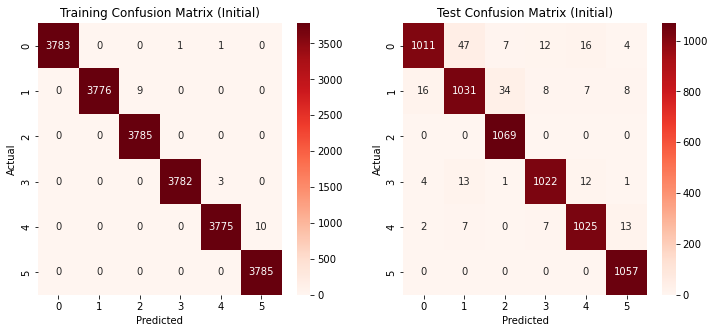

In [225]:
# Confusion Matrix for initial model
train_cm = confusion_matrix(y_train_balanced, y_train_pred_rf)
test_cm = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


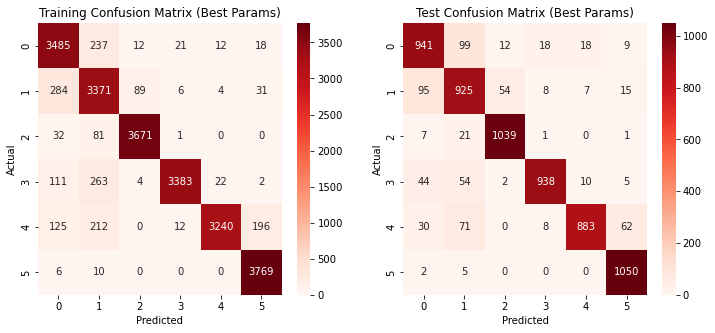

In [227]:
# Confusion Matrix for model with best parameters
train_cm_best = confusion_matrix(y_train_balanced, y_train_pred_best_rf)
test_cm_best = confusion_matrix(y_test, y_test_pred_best_rf)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm_best, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm_best, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [ ]:
#xgboost

In [231]:
import xgboost as xgb

# Step 1: Build the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

# Generate classification report for Training and Test datasets
y_train_pred_xgb = xgb_model.predict(X_train_balanced)
y_test_pred_xgb = xgb_model.predict(X_test)

print("Training Classification Report:\n", classification_report(y_train_balanced, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))




Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3785
           1       0.96      0.97      0.97      3785
           2       0.97      1.00      0.98      3785
           3       0.98      0.98      0.98      3785
           4       0.99      0.98      0.98      3785
           5       0.99      1.00      1.00      3785

    accuracy                           0.98     22710
   macro avg       0.98      0.98      0.98     22710
weighted avg       0.98      0.98      0.98     22710

Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      1097
           1       0.94      0.93      0.93      1104
           2       0.95      0.99      0.97      1069
           3       0.96      0.96      0.96      1053
           4       0.95      0.96      0.95      1054
           5       0.97      1.00      0.98      1057

    accuracy   

In [228]:
#hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_
xgb_best = grid_search.best_estimator_

# Generate classification report with best parameters
y_train_pred_best_xgb = xgb_best.predict(X_train_balanced)
y_test_pred_best_xgb = xgb_best.predict(X_test)

print("Training Classification Report (Best Params):\n", classification_report(y_train_balanced, y_train_pred_best_xgb))
print("Test Classification Report (Best Params):\n", classification_report(y_test, y_test_pred_best_xgb))
print(xgb_best)
print(best_params)

Training Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      3785
           1       0.94      0.94      0.94      3785
           2       0.95      1.00      0.97      3785
           3       0.97      0.97      0.97      3785
           4       0.98      0.94      0.96      3785
           5       0.96      1.00      0.98      3785

    accuracy                           0.96     22710
   macro avg       0.97      0.96      0.96     22710
weighted avg       0.97      0.96      0.96     22710

Test Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.98      0.89      0.94      1097
           1       0.92      0.91      0.92      1104
           2       0.94      1.00      0.96      1069
           3       0.96      0.95      0.95      1053
           4       0.95      0.92      0.94      1054
           5       0.94      1.00      0.9

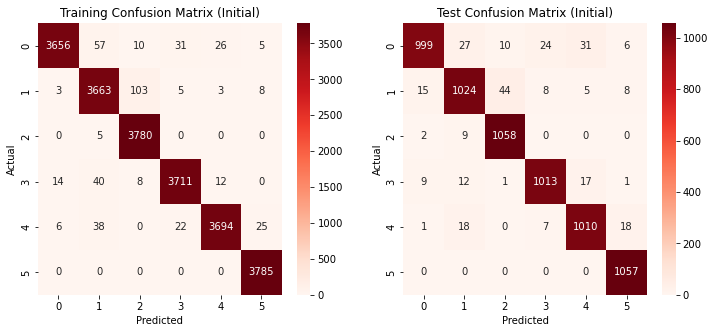

In [232]:
# Confusion Matrix for initial model
train_cm = confusion_matrix(y_train_balanced, y_train_pred_xgb)
test_cm = confusion_matrix(y_test, y_test_pred_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

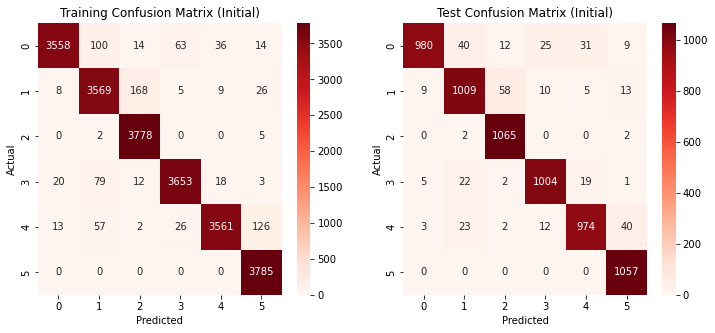

In [235]:
# Confusion Matrix for best model(after hyperparameter tuning)
train_cm = confusion_matrix(y_train_balanced, y_train_pred_best_xgb)
test_cm = confusion_matrix(y_test, y_test_pred_best_xgb)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Training Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Test Confusion Matrix (Initial)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [238]:
results={}
#logistic regression
lr_accuracy = accuracy_score(y_test, y_test_pred_best_lr)
results['Logistic Regression'] = lr_accuracy
#random forest
rf_accuracy = accuracy_score(y_test, y_test_pred_best_rf)
results['Random Forest'] = rf_accuracy

#xgboost
xgb_accuracy = accuracy_score(y_test, y_test_pred_best_xgb)
results['XGBoost'] = xgb_accuracy


In [239]:
results

{'Logistic Regression': 0.9662729250854833,
 'Random Forest': 0.8977308050979174,
 'XGBoost': 0.9463786136151694}

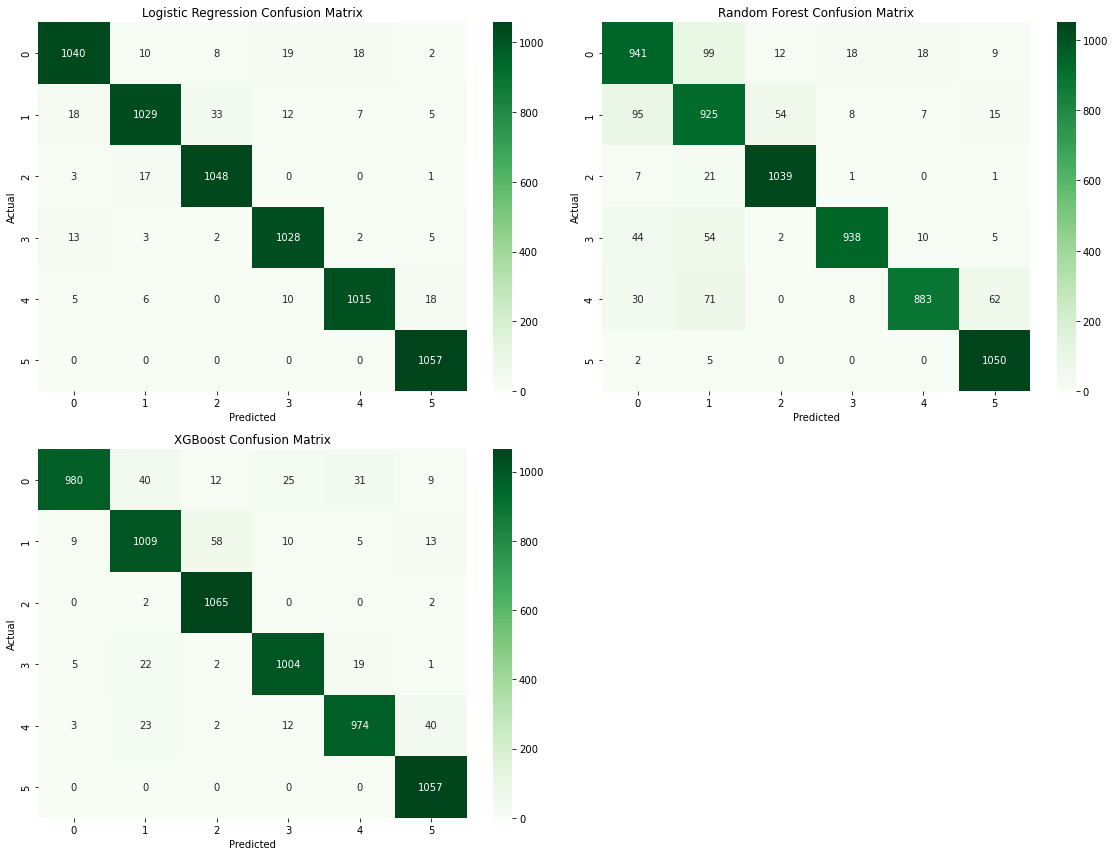

In [243]:
#all 3 confusion matrix
models = {
    'Logistic Regression': y_test_pred_best_lr,
    'Random Forest': y_test_pred_best_rf,
    'XGBoost': y_test_pred_best_xgb
}

plt.figure(figsize=(16, 12))
for i, (model, predictions) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, predictions)
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


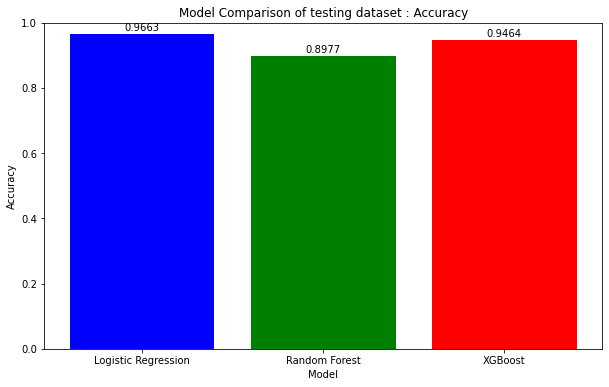

In [246]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison of testing dataset : Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
for i, (model, accuracy) in enumerate(results.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center')

plt.show()


In [ ]:
#SVM to be followed by 

In [ ]:
#selection of the best one and validation dataset.
